<a href="https://colab.research.google.com/github/h26liu/ColonPloypML/blob/main/Copy_of_cv_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
import numpy as np
import cv2

from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

img_path = '/content/drive/My Drive/Colon/test/test.jpg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Read image and convert to gray
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Find contours
th, thres = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

In [ ]:
# Find smaller contour (min-area)
unsorted_cnts = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnts = sorted(unsorted_cnts, key=cv2.contourArea)

for cnt in cnts:
    if cv2.contourArea(cnt) > 100:
        break

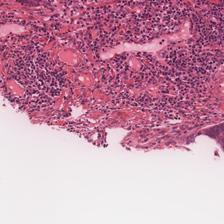

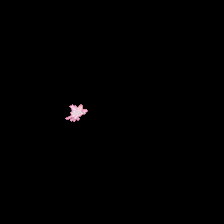

In [ ]:
# Create mask
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt], -1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)

cv2_imshow(img)
cv2_imshow(dst)